In [0]:
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

In [0]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  file = fn

Saving final(3).csv to final(3) (1).csv
User uploaded file "final(3).csv" with length 423517 bytes


In [0]:
estados = pd.read_csv(io.BytesIO(uploaded[file]), header=0) 
estados.head()

,Unnamed: 0,id,molde,estado,created,hora,horaR,piezas,piezasDif,horaDif
0,0,508859,666,1,2018-12-21 20:07:29,1085 days 20:07:29.000000000,26060.0,1558,30,220.0
1,2,498209,666,1,2018-12-12 10:52:51,1076 days 10:52:51.000000000,25835.0,1526,24,170.0
2,4,489275,666,1,2018-12-04 15:31:46,1068 days 15:31:46.000000000,25648.0,1500,65,343.0
3,6,469914,666,1,2018-11-20 06:03:12,1054 days 06:03:12.000000000,25302.0,1435,0,9.0
4,8,469681,666,1,2018-11-19 20:03:33,1053 days 20:03:33.000000000,25292.0,1435,22,142.0


In [0]:
def get_data(normalized=0):
    estados = pd.read_csv(io.BytesIO(uploaded[file]), header=0) 
    
    df = pd.DataFrame(estados)
    df = df.sort_values(by=['molde','created'])
    df.drop(df.columns[[0,1,3,4,5,6,7]], axis=1, inplace=True) 
    df.columns = ['molde', 'piezas', 'hora']
    return df

df = get_data()
df = df.drop(df[df.piezas == 0].index)
df = df.drop(df[df.hora > 500].index)
df

,molde,piezas,hora
995,133,13,190.0
307,145,2,449.0
305,145,2,180.0
2777,170,14,485.0
2775,170,10,167.0
2774,170,6,360.0
2767,170,3,142.0
2013,218,14,191.0
2011,218,18,126.0
2010,218,44,398.0


In [0]:
def load_data(cambios, seq_len):
    amount_of_features = len(cambios.columns)
    data = cambios.as_matrix()
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [0]:
def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[2]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

def build_model2(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,init='uniform',activation='relu'))        
        model.add(Dense(1,init='uniform',activation='relu'))
        model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
        return model

In [0]:
sequence_length = 15
X_train, y_train, X_test, y_test = load_data(df[::-1], sequence_length)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (585, 15, 3)
y_train (585,)
X_test (65, 15, 3)
y_test (65,)


In [0]:
model = build_model2([3,sequence_length,1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`


In [0]:
model.fit(
    X_train,
    y_train,
    batch_size=8,
    epochs=50,
    validation_split=0.2,
    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 468 samples, validate on 117 samples
Epoch 1/50
468/468 [==============================] - 4s 9ms/step - loss: 68480.3828 - acc: 0.0000e+00 - val_loss: 71170.0981 - val_acc: 0.0085
Epoch 2/50
468/468 [==============================] - 2s 4ms/step - loss: 65130.2051 - acc: 0.0000e+00 - val_loss: 65913.5868 - val_acc: 0.0000e+00
Epoch 3/50
468/468 [==============================] - 2s 4ms/step - loss: 58428.1895 - acc: 0.0000e+00 - val_loss: 57363.9444 - val_acc: 0.0000e+00
Epoch 4/50
468/468 [==============================] - 2s 3ms/step - loss: 49529.6924 - acc: 0.0021 - val_loss: 47449.0711 - val_acc: 0.0085
Epoch 5/50
468/468 [==============================] - 2s 4ms/step - loss: 39764.1510 - acc: 0.0021 - val_loss: 37575.2141 - val_acc: 0.0085
Epoch 6/50
468/468 [==============================] - 2s 4ms/step - loss: 30994.2997 - acc: 0.0021 - val_loss: 29310.4845 - val_acc: 0.0000e+00
Epoch 7/50
468/468 [======================

In [0]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))


Train Score: 17058.05 MSE (130.61 RMSE)
Test Score: 16498.10 MSE (128.44 RMSE)


In [0]:
 print(X_test[-1])
diff=[]
ratio=[]
p = model.predict(X_test)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
    print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))


[[418.  41. 432.]
 [414.  43. 235.]
 [414.  21.  73.]
 [414.  24. 205.]
 [414.  47. 475.]
 [414.  15. 115.]
 [342.   1. 227.]
 [218.  44. 398.]
 [218.  18. 126.]
 [218.  14. 191.]
 [170.   3. 142.]
 [170.   6. 360.]
 [170.  10. 167.]
 [170.  14. 485.]
 [145.   2. 180.]]
0 112.0 227.42523 -0.5075304571627168 115.42523193359375
1 313.0 227.42523 0.3762764902506217 85.57476806640625
2 160.0 227.42523 -0.2964720816610241 67.42523193359375
3 96.0 227.42523 -0.5778832489966145 131.42523193359375
4 70.0 227.42523 -0.692206535726698 157.42523193359375
5 48.0 227.42523 -0.7889416244983072 179.42523193359375
6 408.0 227.42523 0.7939961917643885 180.57476806640625
7 260.0 227.42523 0.14323286730083584 32.57476806640625
8 186.0 227.42523 -0.1821487949309405 41.42523193359375
9 302.0 227.42523 0.327908945864817 74.57476806640625
10 239.0 227.42523 0.05089482801884526 11.57476806640625
11 306.0 227.42523 0.34549714382329144 78.57476806640625
12 393.0 227.42523 0.7280404494201096 165.57476806640625
1

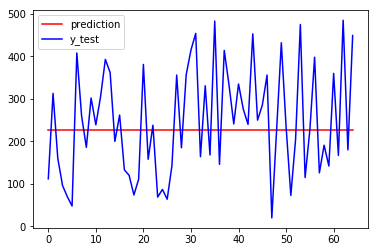

In [0]:
import matplotlib.pyplot as plt2

plt2.plot(p,color='red', label='prediction')
plt2.plot(y_test,color='blue', label='y_test')
plt2.legend(loc='upper left')
plt2.show()